# ***________________________________________________________________________________________________________***

# **PROYECTO FINAL - INTRODUCCION A MACHINE LEARNING**


# *"PREDICCIÓN DE PRECIOS DE CASAS PARA EL ESTADO DE CALIFORNIA - USA"*


# **Autor:** 

# **OSCAR ANDRÉS CARDONA MOSCOTE**

# ***________________________________________________________________________________________________________***


# ***1) ENTENDIMIENTO DEL NEGOCIO***

# ***__________________________________________________________________________________________________***


**Objetivos del Negocio y situacion Actual:**

    El estado de California en Estados Unidos se extiende desde la frontera con México por la costa del Pacífico por cerca de 900 millas. Su terreno incluye playas con acantilados, bosques de secoya, la cordillera Sierra Nevada, las tierras de cultivo del Valle Central de California y el desierto de Mojave.

    Bajo estas increíbles condiciones, el mercado de bienes raíces es altamente cotizado, razón por la cual el mercado es constantemente monitoreado y la información recabada es procesada para su análisis y posterior revisión por parte de los organismos interesados en evaluar los precios de los distintos tipos de propiedades ofertadas en el territorio.
 


**Metas del proyecto:**

    Para este proyecto se busca realizar posibles predicciones en el precio de media de las propiedades disponibles en el data set, para ello nos vamos a apoyar de un modelo predictivo que haga uso de IA y la cual nos retorne información valiosa para la toma de decisiones. 
    

# ***__________________________________________________________________________________________________***

# ***2) ENTENDIMIENTO DE LOS DATOS***

# ***__________________________________________________________________________________________________***

**Recoleccion inicia de los datos:**

    El data set utilizado para este proyecto se obtiene del dominio:
    https://query.data.world/s/yffqqcx3rsjlzspztxr6zt5iqd45kn

**Descripcion de los datos:**

    Los distintos tipos de datos a trabajar en este proyecto se visualizan en el data set "housing.csv" y en este podemos encontrar información relevante a evaluar como lo es la edad media de la casa, cantidad de habitaciones, el ingreso medio, la media del valor de la casa, entre otros.

Para ser más específicos con las columnas, presentamos el detalle de cada una:

**- longitude** - Coordenadas en longitud de la porpiedad

**- latitude** - Coordenadas en latitud de la porpiedad

**- housing_median_age** - edad promedio de la propiedad

**- total_rooms** - cantidad de habitaciones registradas de la propiedad

**- total_bedrooms** - cantidad de dormitorios registrados de la propiedad

**- population** - población proxima a la propiedad

**- households** - hogares proximos a la propiedad

**- median_income** - ingresos medios

**- median_house_value** - valor medio de la propiedad

**- ocean_proximity** - proximidad al mar (en este caso nos indica el sector de la propiedad)

# ***__________________________________________________________________________________________________***
    

**Importando librerias y utilidades**

In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
from matplotlib.pyplot import step
import numpy as np
import pandas as pd
from pandas.plotting import scatter_matrix
import seaborn as sn
import sklearn
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import RandomizedSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
import folium
from folium import plugins
from folium.plugins import HeatMap
from pyparsing import alphas

In [2]:
df=pd.read_csv("./housing.csv")

**Exploracion de los datos:**
    
    Una vez realizado el cargue del data set procedemos a realizar la exploración de los datos en nuestro dataframe, identificamos cuantas filas y columnas lo componen.

    (20640 filas y 10 columnas)

In [3]:
df.shape

(20640, 10)

In [4]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
0,-122.23,37.88,41.0,880.0,129.0,322.0,126.0,8.3252,452600.0,NEAR BAY
1,-122.22,37.86,21.0,7099.0,1106.0,2401.0,1138.0,8.3014,358500.0,NEAR BAY
2,-122.24,37.85,52.0,1467.0,190.0,496.0,177.0,7.2574,352100.0,NEAR BAY
3,-122.25,37.85,52.0,1274.0,235.0,558.0,219.0,5.6431,341300.0,NEAR BAY
4,-122.25,37.85,52.0,1627.0,280.0,565.0,259.0,3.8462,342200.0,NEAR BAY


In [5]:
df.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,20640.000000,20640.000000,20640.000000,20640.000000,20433.000000,20640.000000,20640.000000,20640.000000,20640.000000
mean,-119.569704,35.631861,28.639486,2635.763081,537.870553,1425.476744,499.539680,3.870671,206855.816909
std,2.003532,2.135952,12.585558,2181.615252,421.385070,1132.462122,382.329753,1.899822,115395.615874
min,-124.350000,32.540000,1.000000,2.000000,1.000000,3.000000,1.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1447.750000,296.000000,787.000000,280.000000,2.563400,119600.000000
50%,-118.490000,34.260000,29.000000,2127.000000,435.000000,1166.000000,409.000000,3.534800,179700.000000
75%,-118.010000,37.710000,37.000000,3148.000000,647.000000,1725.000000,605.000000,4.743250,264725.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


In [6]:
df.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

# ***__________________________________________________________________________________________________***

# ***3) PREPARACIÓN DE LOS DATOS***

# ***__________________________________________________________________________________________________***


    
    En este punto logramos identificar los tipos de datos a trabajar por parte del data set, encontrando que en su mayoría son de tipo numéricos, a excepción de la última columna "ocean_proximity" que es de tipo object, para propósitos de este proyecto más adelante será afectada la columna con un procesado para darle un manejo igualitario a cada columna de datos.

In [7]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND           5
Name: ocean_proximity, dtype: int64


    
    Se observan 5 datos con categoría ISLAND (de la columna ocean_proximity) pero consideramos irrelevante estos datos por tanto procedemos a su eliminación para evitar posibles conflictos de datos más adelante.

In [8]:
df=df.drop(df[df['ocean_proximity']=='ISLAND'].index)

In [9]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
Name: ocean_proximity, dtype: int64

**Visualización de los datos:**
    
    En las siguientes impresiones graficas veremos ciertos cuadros de evaluación para interpretar información relevante acerca del proyecto.

<AxesSubplot: >

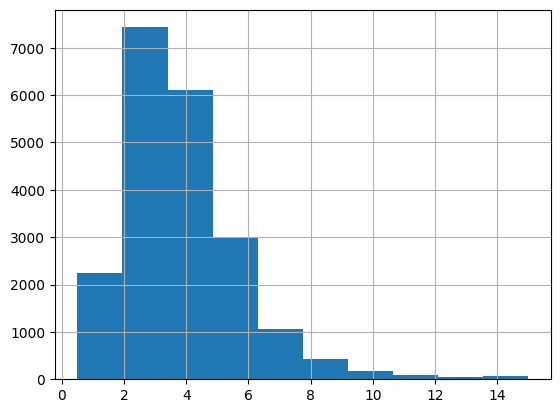

In [10]:
df['median_income'].hist()

array([[<AxesSubplot: title={'center': 'longitude'}>,
        <AxesSubplot: title={'center': 'latitude'}>,
        <AxesSubplot: title={'center': 'housing_median_age'}>],
       [<AxesSubplot: title={'center': 'total_rooms'}>,
        <AxesSubplot: title={'center': 'total_bedrooms'}>,
        <AxesSubplot: title={'center': 'population'}>],
       [<AxesSubplot: title={'center': 'households'}>,
        <AxesSubplot: title={'center': 'median_income'}>,
        <AxesSubplot: title={'center': 'median_house_value'}>]],
      dtype=object)

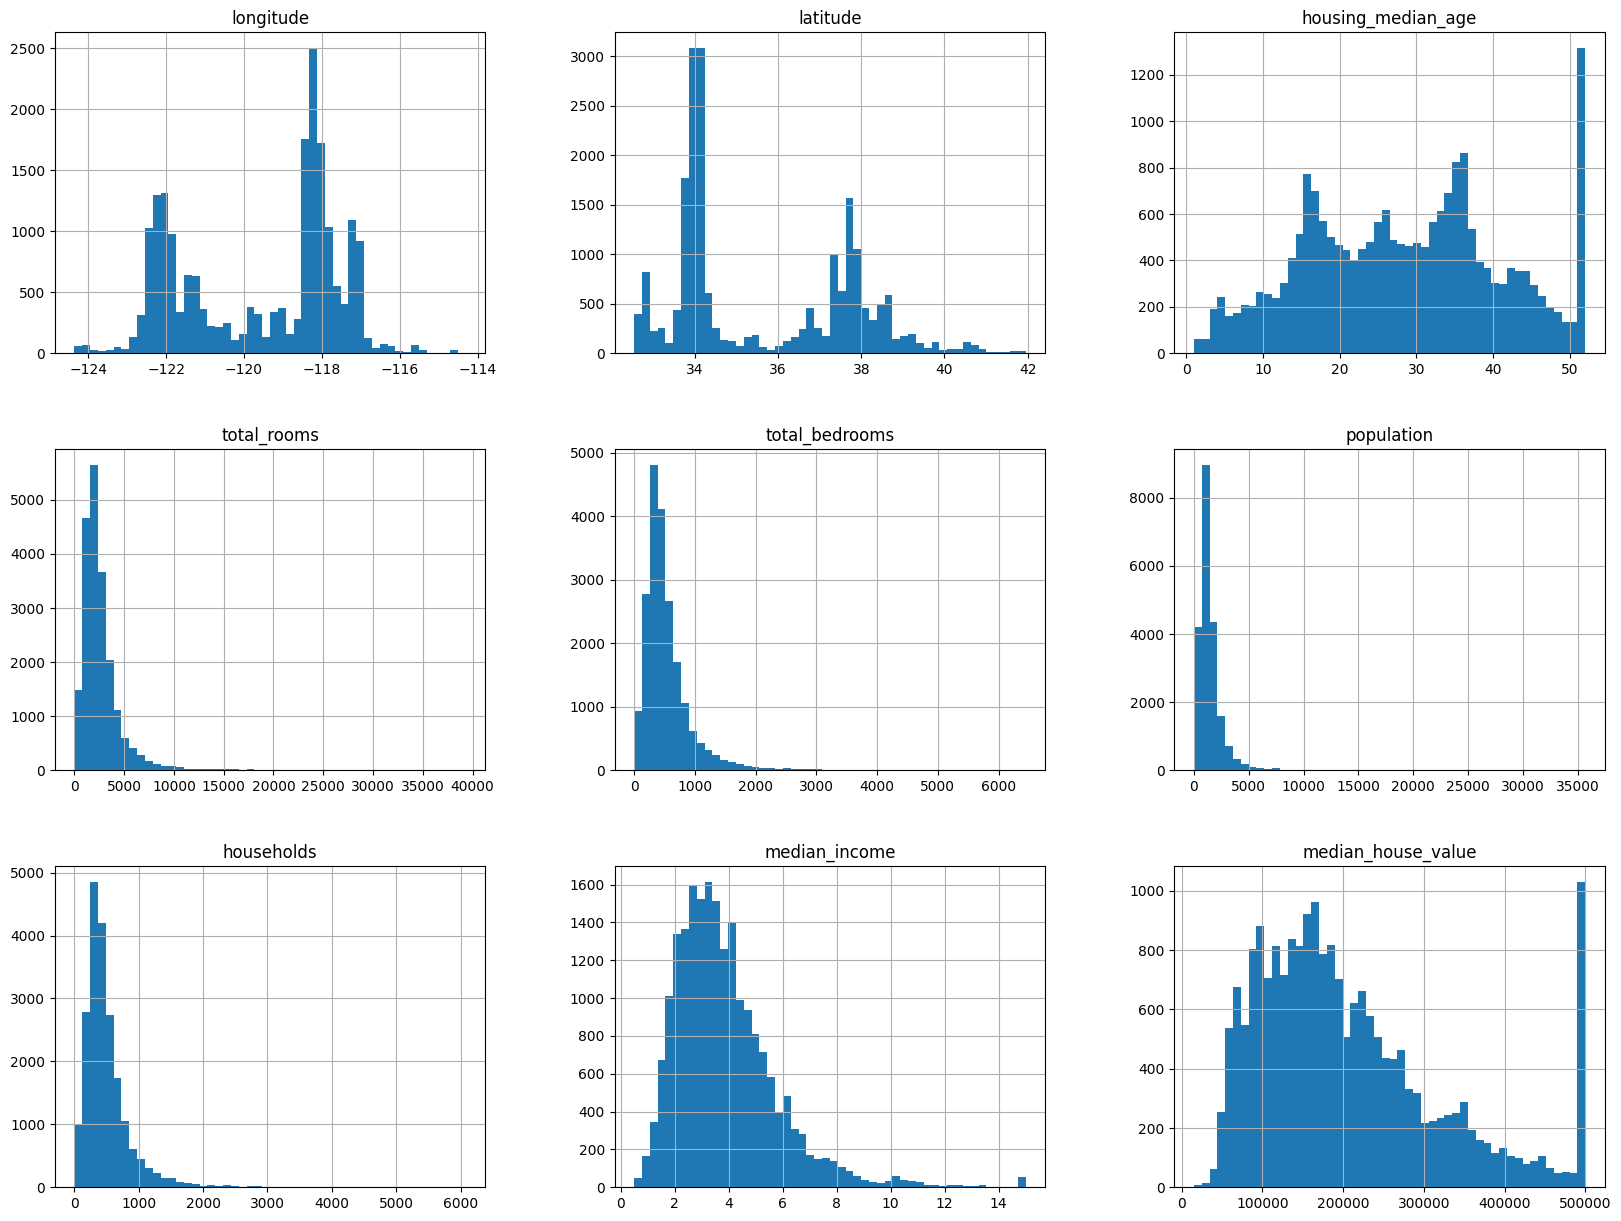

In [11]:
df.hist(bins=50,figsize=(20,15))

**Visualización de los datos:**
    
    Procedemos a realizar un mapa de dispersión para visualizar los datos de forma en que se forma un mapa de la zona habitable en las cuales se distribuyen estas propiedades.

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

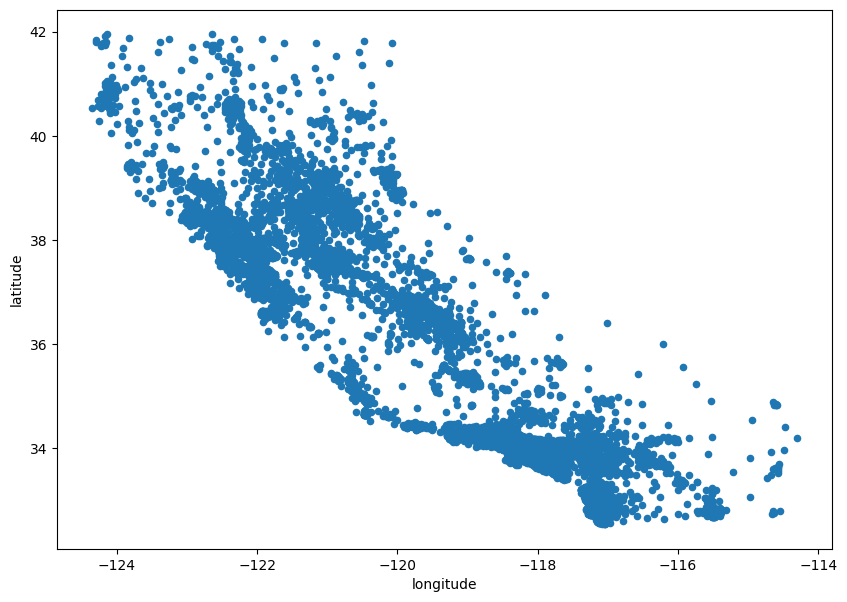

In [12]:
df.plot(kind='scatter',x='longitude',y='latitude',figsize=(10,7))

**Visualización de los datos:**
    
    Procedemos a añadir un Alpha para resaltar las zonas con mayor cantidad de población (mayor cantidad de propiedades).

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

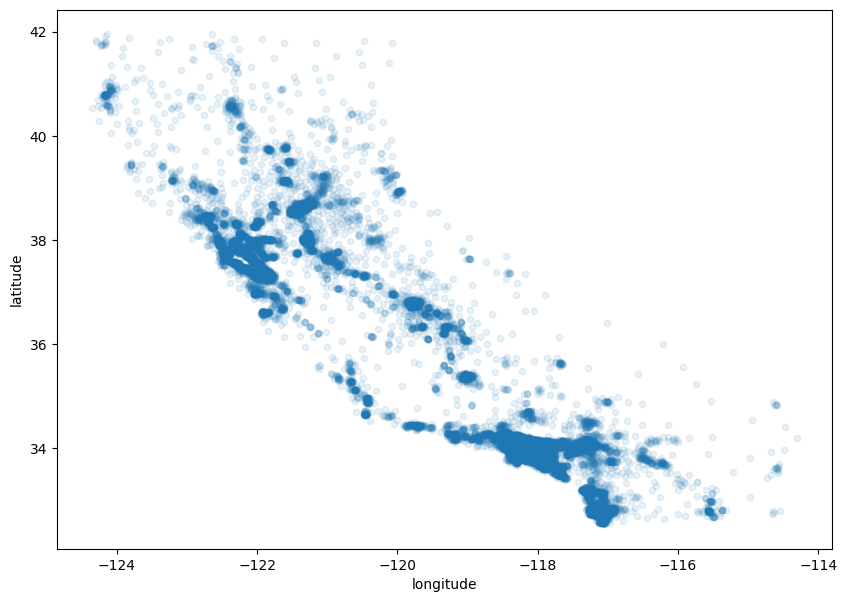

In [13]:
df.plot(kind='scatter',x='longitude',alpha=0.1,y='latitude',figsize=(10,7))

**Visualización de los datos:**
    
    Ahora mostramos un mapa a color para identificar las zonas con mayor población o en las cuales se encuentran las propiedades más solicitadas.

<AxesSubplot: xlabel='longitude', ylabel='latitude'>

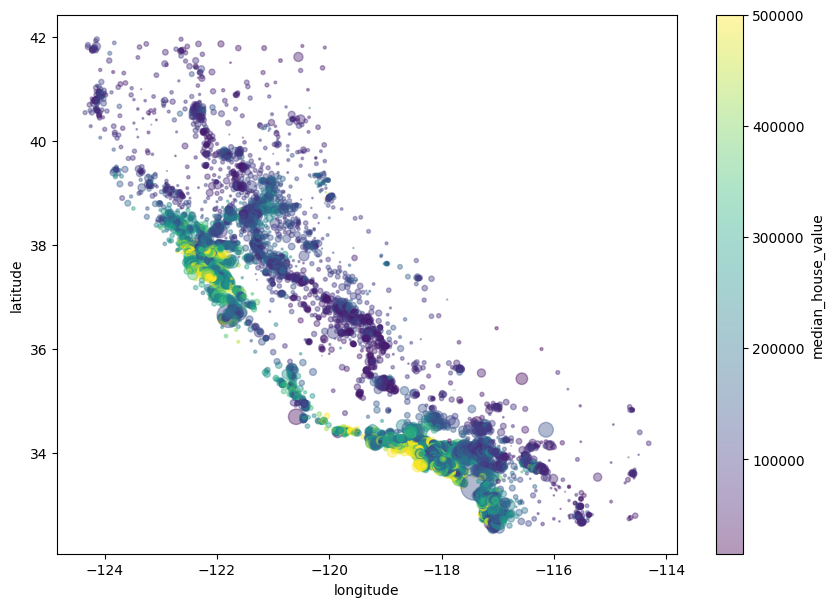

In [14]:
df.plot(kind='scatter',x='longitude',alpha=0.4,y='latitude',figsize=(10,7),s=df['population']/100,c='median_house_value',colorbar=True)

**Visualización de los datos:**
    
    Hacemos uso del plugin de la libreria Folium.

In [15]:
map=folium.Map(location=[37.50,-122.2],zoom_start=6)
map

In [16]:
distritos=df[['latitude','longitude']].to_numpy()
distritos

array([[  37.88, -122.23],
       [  37.86, -122.22],
       [  37.85, -122.24],
       ...,
       [  39.43, -121.22],
       [  39.43, -121.32],
       [  39.37, -121.24]])

**Visualización de los datos:**
    
    Nuevamente usamos un mapa de calor para las zonas mayormente pobladas.

In [17]:
HeatMap(distritos,radius=15,max_val=0.1,min_opacity=0.4).add_to(map)
map

C:\Users\osdre\AppData\Local\Temp\ipykernel_11460\4237166487.py:1: UserWarning: The `max_val` parameter is no longer necessary. The largest intensity is calculated automatically.
  HeatMap(distritos,radius=15,max_val=0.1,min_opacity=0.4).add_to(map)


array([[<AxesSubplot: xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='median_income'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='median_income', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='total_rooms', ylabel='total_rooms'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='total_rooms'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot: xlabel

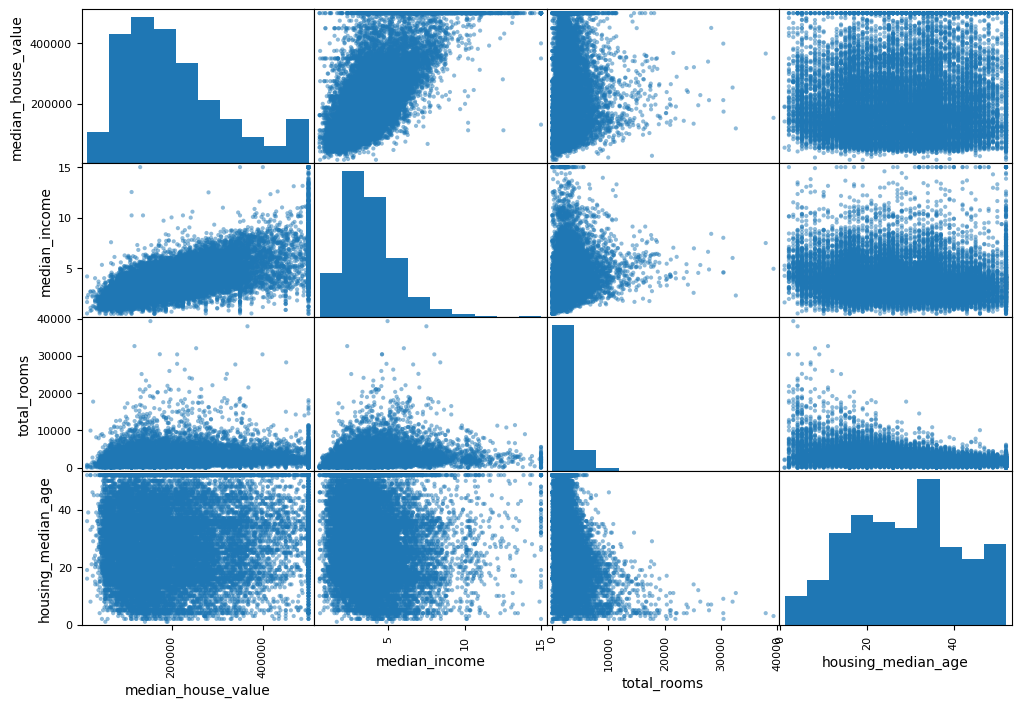

In [18]:
atributos=["median_house_value","median_income","total_rooms","housing_median_age"]
scatter_matrix(df[atributos],figsize=(12,8))

array([[<AxesSubplot: xlabel='median_house_value', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_house_value'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_house_value'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='median_income'>,
        <AxesSubplot: xlabel='median_income', ylabel='median_income'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='median_income'>],
       [<AxesSubplot: xlabel='median_house_value', ylabel='housing_median_age'>,
        <AxesSubplot: xlabel='median_income', ylabel='housing_median_age'>,
        <AxesSubplot: xlabel='housing_median_age', ylabel='housing_median_age'>]],
      dtype=object)

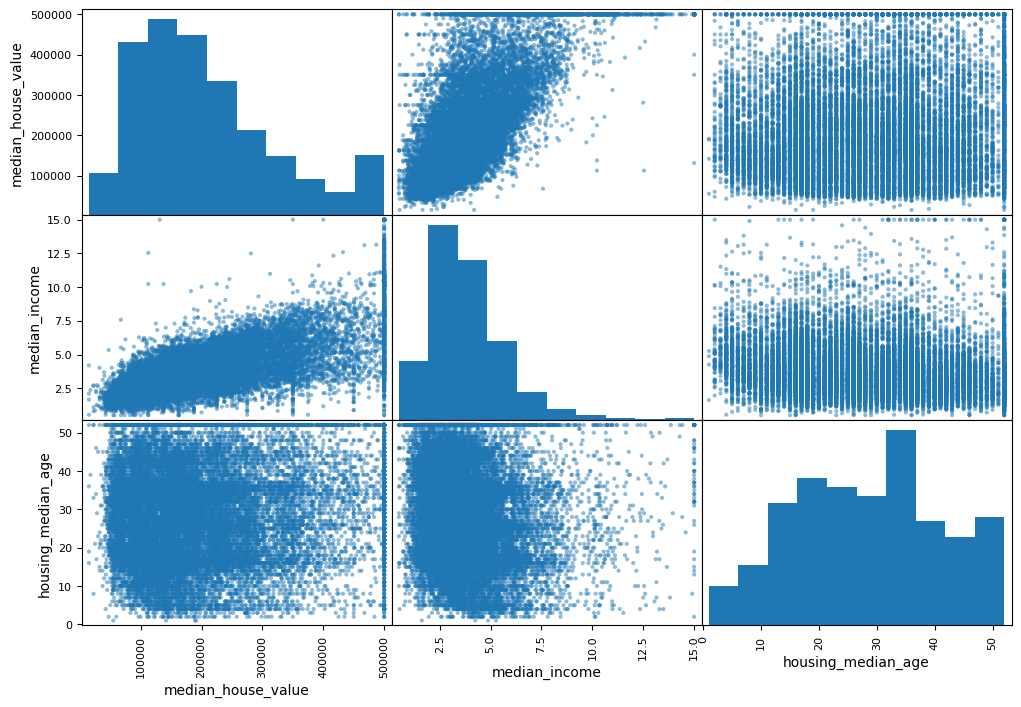

In [19]:
atributos=["median_house_value","median_income","housing_median_age"]
scatter_matrix(df[atributos],figsize=(12,8))

**Tratamiento de los datos:**
    
    Creamos una nueva columna en el data set, la cual será nombrada como "bed_rooms_per_room" y tomara los datos provistos por el total de dormitorios dividido entre el total de habitaciones.

In [20]:
df['bed_rooms_per_room']=df['total_bedrooms']/df['total_rooms']

In [21]:
atributos=["median_house_value","median_income","bed_rooms_per_room","total_rooms","housing_median_age"]

**Visualización de los datos:**
    
    Imprimimos una matriz de correlación para contrastar cierta información relevante.

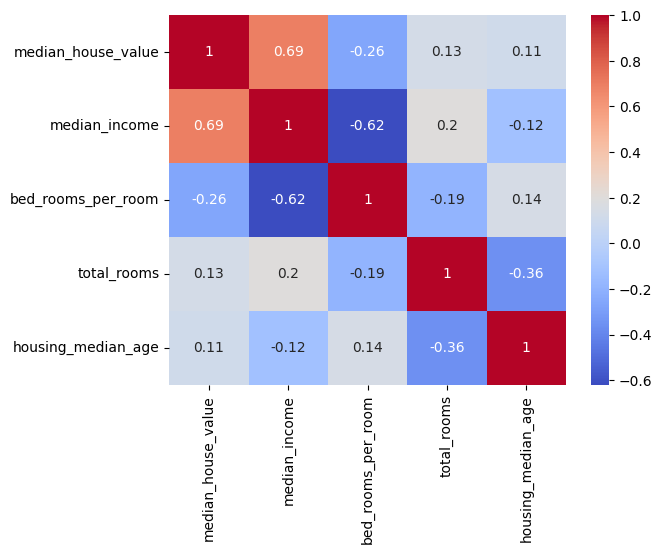

In [22]:
matriz_corr=df[atributos].corr().round(2)
sn.heatmap(matriz_corr,annot=True,cmap='coolwarm')
plt.show()

**Limpieza de los datos:**

    Verificaremos si el data set presenta valores nulos y posterior a esto decidiremos si los valores faltantes o nulos impactan de alguna forma el proyecto, de esta manera podemos o bien continuar con estos datos y buscar un metodo para validarlos de alguna forma o eliminamos estos datos del data set para no afectar procesos futuros.

In [23]:
df.isnull().values.any()

True

In [24]:
len(df)

20635

In [25]:
df=df.dropna()
len(df)

20428

**Limpieza de los datos:**

    Como podemos observar hemos decidido obviar estos datos al ser una cantidad mínima, y no consideramos que se presente algún tipo de error en la comprobación del modelo de entrenamiento para la predicción de precios por ser eliminados.

In [26]:
df['ocean_proximity'].value_counts()

<1H OCEAN     9034
INLAND        6496
NEAR OCEAN    2628
NEAR BAY      2270
Name: ocean_proximity, dtype: int64

# ***__________________________________________________________________________________________________***

# ***4) MODELAMIENTO***

# ***__________________________________________________________________________________________________***

**Tratamiento de los datos:**

    Procedemos a generar una catalogación nominal, como hemos dicho con anticipación la columna "ocean_proximity" es de tipo "object" y queremos dar un trato igualitario para todos los datos, por lo tanto, se ha decidido trabajar con estos de forma nominal, creando un array list que almacene los 4 tipos de valores encontrados en esta columna.

In [27]:
cod_nominal=OneHotEncoder(sparse=False)
cod_nominal.fit_transform(df[['ocean_proximity']])

array([[0., 0., 1., 0.],
       [0., 0., 1., 0.],
       [0., 0., 1., 0.],
       ...,
       [0., 1., 0., 0.],
       [0., 1., 0., 0.],
       [0., 1., 0., 0.]])

In [28]:
cod_nominal.categories_

[array(['<1H OCEAN', 'INLAND', 'NEAR BAY', 'NEAR OCEAN'], dtype=object)]

In [29]:
lista_numerica=['median_income','total_rooms','housing_median_age','bed_rooms_per_room']
lista_categorica=['ocean_proximity']

In [30]:
trans_numerico=Pipeline(steps=[('scaler',StandardScaler())])
trans_categorica=Pipeline(steps=[('onehot',OneHotEncoder())])

In [31]:
trans=ColumnTransformer([
    ('num',trans_numerico,lista_numerica),('cat',trans_categorica,lista_categorica)])

In [32]:
X=df.drop('median_house_value',axis=1)

In [33]:
y=df['median_house_value']

**Selección del modelo**

    Para nuestro proyecto entrenaremos distintos modelos para su posterior comparación, se entrenarán modelos de Regresión linear, Arboles de decisión y RandomForest, de estos elegiremos el mejor y más adecuado para aplicarlo en la métrica de evaluación y de esta forma intentar llegar al objetivo del proyecto.

    Como se puede intuir, para el desarrollo de este proyecto nos hemos decantado por un modelo Supervisado de Regresión, pues a lo largo del proyecto tendremos que dar pautas manuales para el óptimo funcionamiento de los modelos evaluados.

In [34]:
X_train,X_test,y_train,y_test=train_test_split(X,y,train_size=0.7)

In [35]:
X_train.shape,X_test.shape,y_train.shape,y_test.shape

((14299, 10), (6129, 10), (14299,), (6129,))

**Regresión Linear**
    
    Una vez preparados los datos y separados mediante splits, iniciamos con el modelo de Regresion Linear a fin de lograr obtener parametros como Scores, Mean y Standard deviation.

In [36]:
reg_linear=LinearRegression()

In [37]:
model_linear_reg=Pipeline([
    ('trans',trans),('reg_linear',reg_linear)])

In [38]:
model_linear_reg.fit(X_train,y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['median_income',
                                                   'total_rooms',
                                                   'housing_median_age',
                                                   'bed_rooms_per_room']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('reg_linear', LinearRegression())])

**Predicción del Modelo: Regresión Linear**
    
    Despues de efectuado el Pipeline con la transformación y el modelo a aplicar, nos arrojan valores de predicción que tendremos que comparar con los valores reales del mercado.

In [39]:
muestra_datos=X_test.iloc[:4]
model_linear_reg.predict(muestra_datos)

array([210422.74530294, 246498.6001557 , 268671.82800859, 110855.04289728])

**Comparación con los Pecios reales del mercado**
    
    Ahora daremos impresión de los datos reales para ser comparados.

In [40]:
list(y_test.iloc[:4])

[275000.0, 350000.0, 223900.0, 138800.0]

In [41]:
linear_scores=cross_val_score(model_linear_reg,X,y,scoring='neg_mean_squared_error',cv=10)
linear_scores

array([-7.64145618e+09, -3.62379596e+09, -8.40772085e+09, -4.95201730e+09,
       -7.23916050e+09, -4.95204805e+09, -3.03176233e+09, -8.62228281e+09,
       -6.95203995e+09, -3.02446964e+09])

In [42]:
linear_rmse_scores=np.sqrt(-linear_scores)
linear_rmse_scores

array([87415.42302706, 60197.97308401, 91693.62490208, 70370.57129749,
       85083.25630871, 70370.78972416, 55061.4413639 , 92856.24809547,
       83378.89389226, 54995.17835757])

In [43]:
def display_scores(scores):
    print('scores: ',scores)
    print('Mean: ',scores.mean())
    print('Standar Deviation:',scores.std())

In [44]:
display_scores(linear_rmse_scores)

scores:  [87415.42302706 60197.97308401 91693.62490208 70370.57129749
 85083.25630871 70370.78972416 55061.4413639  92856.24809547
 83378.89389226 54995.17835757]
Mean:  75142.34000527124
Standar Deviation: 14082.04871236893


**Arbol de decisión**
    
    De igual forma que hicimos con la regresión linear aplicaremos este modelo, una vez preparados los datos y separados mediante splits, iniciamos con el modelo de Arbol de Decisión a fin de lograr obtener parametros como Scores, Mean y Standard deviation.

In [45]:
tree_reg=DecisionTreeRegressor(random_state=42)
model_tree_reg=Pipeline(steps=[
    ('trans',trans),('tree_reg',tree_reg)
])
model_tree_reg.fit(X_train,y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['median_income',
                                                   'total_rooms',
                                                   'housing_median_age',
                                                   'bed_rooms_per_room']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('tree_reg', DecisionTreeRegressor(random_state=42))])

**Predicción del Modelo: Arboles de decisión**
    
    Despues de efectuado el Pipeline con la transformación y el modelo a aplicar, nos arrojan valores de predicción que tendremos que comparar con los valores reales del mercado.

In [46]:
muestra_datos=X_test.iloc[:4]
model_tree_reg.predict(muestra_datos)

array([176100., 234500., 190300.,  81900.])

**Comparación con los Pecios reales del mercado**
    
    Ahora daremos impresión de los datos reales para ser comparados.

In [47]:
list(y_test.iloc[:4])

[275000.0, 350000.0, 223900.0, 138800.0]

In [48]:
tree_reg_scores=cross_val_score(model_tree_reg,X,y,scoring='neg_mean_squared_error',cv=10)
tree_reg_scores

array([-1.17696254e+10, -6.18576689e+09, -1.39544881e+10, -1.04472452e+10,
       -1.00833262e+10, -8.19817255e+09, -5.17298946e+09, -1.15258382e+10,
       -1.11834531e+10, -6.22518606e+09])

In [49]:
tree_rmse_scores=np.sqrt(-tree_reg_scores)
tree_rmse_scores

array([108487.90421835,  78649.64649946, 118129.11634901, 102211.76654049,
       100415.76660442,  90543.76041471,  71923.49729371, 107358.45653869,
       105751.84698037,  78899.84829229])

In [50]:
display_scores(tree_rmse_scores)

scores:  [108487.90421835  78649.64649946 118129.11634901 102211.76654049
 100415.76660442  90543.76041471  71923.49729371 107358.45653869
 105751.84698037  78899.84829229]
Mean:  96237.1609731489
Standar Deviation: 14595.135044285802


**RandomForest**
    
    Por último, una vez establecidos los modelos de regresión linear y Arboles de Decisión aplicaremos este modelo, una vez preparados los datos y separados mediante splits, iniciamos con el modelo de RandomForest a fin de lograr obtener parámetros como Scores, Mean y Standard deviation.

In [51]:
forest_reg=RandomForestRegressor(n_estimators=10,random_state=42)

In [52]:
model_forest_reg=Pipeline(steps=[
    ('trans',trans),('forest_reg',forest_reg)
])

In [53]:
model_forest_reg.fit(X_train,y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['median_income',
                                                   'total_rooms',
                                                   'housing_median_age',
                                                   'bed_rooms_per_room']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('forest_reg',
                 RandomForestRegressor(n_estimators=10, random_state=42))])

**Predicción del Modelo RandomForest**
    
    Despues de efectuado el Pipeline con la transformación y el modelo a aplicar, nos arrojan valores de predicción que tendremos que comparar con los valores reales del mercado.

In [54]:
muestra_datos=X_test.iloc[:4]
model_forest_reg.predict(muestra_datos)

array([190650., 299590., 255310., 145240.])

**Comparación con los Pecios reales del mercado**
    
    Ahora daremos impresión de los datos reales para ser comparados.

In [55]:
list(y_test.iloc[:4])

[275000.0, 350000.0, 223900.0, 138800.0]

In [56]:
forest_reg_scores=cross_val_score(model_forest_reg,X,y,scoring='neg_mean_squared_error',cv=10)
forest_reg_scores

array([-6.63049223e+09, -3.62799811e+09, -7.62667079e+09, -5.91395676e+09,
       -6.39595211e+09, -5.26710395e+09, -2.84682711e+09, -7.51946233e+09,
       -7.09787805e+09, -3.56119790e+09])

In [57]:
forest_rmse_score=np.sqrt(-forest_reg_scores)
forest_rmse_score

array([81427.8344987 , 60232.86568128, 87330.81235751, 76902.25460285,
       79974.69668032, 72574.81620828, 53355.666101  , 86714.83339797,
       84248.90531344, 59675.77316538])

In [58]:
display_scores(forest_rmse_score)

scores:  [81427.8344987  60232.86568128 87330.81235751 76902.25460285
 79974.69668032 72574.81620828 53355.666101   86714.83339797
 84248.90531344 59675.77316538]
Mean:  74243.84580067266
Standar Deviation: 11687.82674025645


**Comparación de los modelos**

    Ahora que tenemos los datos procesados mediante los diferentes modelos aplicados al data set, procedemos a ver una comparativa grafica de sus resultados, en la cual contrastaremos los valores de la Media y la Desviación estándar.

    Posterior a esto damos elección al mejor modelo para su puesta a punto, es decir un mejor entrenamiento y afinación.

In [59]:
display_scores(linear_rmse_scores)
print('-'*80)
display_scores(tree_rmse_scores)
print('-'*80)
display_scores(forest_rmse_score)

scores:  [87415.42302706 60197.97308401 91693.62490208 70370.57129749
 85083.25630871 70370.78972416 55061.4413639  92856.24809547
 83378.89389226 54995.17835757]
Mean:  75142.34000527124
Standar Deviation: 14082.04871236893
--------------------------------------------------------------------------------
scores:  [108487.90421835  78649.64649946 118129.11634901 102211.76654049
 100415.76660442  90543.76041471  71923.49729371 107358.45653869
 105751.84698037  78899.84829229]
Mean:  96237.1609731489
Standar Deviation: 14595.135044285802
--------------------------------------------------------------------------------
scores:  [81427.8344987  60232.86568128 87330.81235751 76902.25460285
 79974.69668032 72574.81620828 53355.666101   86714.83339797
 84248.90531344 59675.77316538]
Mean:  74243.84580067266
Standar Deviation: 11687.82674025645


In [60]:
list_model=['Linear Regression','DecisionTree','Random Forest']
list_mean=[75142,96237,74243]
list_sd=[14082,14595,11687]

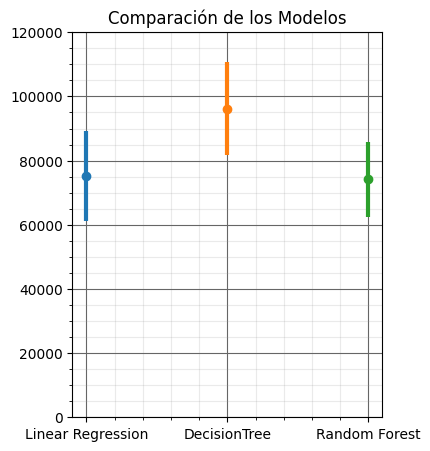

In [61]:
plt.figure(figsize=(4,5))
for i in range(3):
    plt.errorbar(i,list_mean[i],xerr=0,yerr=list_sd[i],fmt='o',linewidth=3)
plt.xticks([0,1,2],list_model)
plt.title("Comparación de los Modelos")
plt.ylim(0,120000)
plt.grid(visible=True,which='major',color='#666666',linestyle='-')
plt.minorticks_on()
plt.grid(visible=True,which='minor',color='#999999',linestyle='-',alpha=0.2)
plt.show()

**Interpretación de la Grafica**

    Como se logra observar, al aplicar los diferentes modelos nos arrojan datos interesantes, tales como que la Regresión Linear y el RandomForest tienen valores de media muy similares, pero su desviación estándar es, aunque mínima, una medida de comparación que nos permite decantarnos por ese modelo (RandomForest) pues al ser su medida de desviación estándar más baja, lo hace un modelo más consistente.

# ***__________________________________________________________________________________________________***

# ***5) EVALUACIÓN***

# ***__________________________________________________________________________________________________***

**Afinamiento del modelo seleccionado**

    Ahora que hemos elegido un modelo, procederemos a afinar el mismo indicándole parámetros y posibles valores, estos serán añadidos o definidos por nosotros y por lo tanto su fiabilidad depende de nuestro análisis.

    Para esto crearemos un diccionario en el cual estarán los valores previamente descritos (parámetros y posibles valores).

In [62]:
n_estimators=[3,10,30,50,80,100]
min_samples_split=[2,4,6,8]
max_depth=[2,4,6,8,10]

In [63]:
params={'forest_reg__n_estimators':n_estimators,'forest_reg__min_samples_split':min_samples_split,'forest_reg__max_depth':max_depth}
print(params)

{'forest_reg__n_estimators': [3, 10, 30, 50, 80, 100], 'forest_reg__min_samples_split': [2, 4, 6, 8], 'forest_reg__max_depth': [2, 4, 6, 8, 10]}


In [64]:
grid=GridSearchCV(model_forest_reg,param_grid=params,cv=10,scoring='neg_mean_squared_error',n_jobs=-1,verbose=2)

In [65]:
grid.fit(X,y)

Fitting 10 folds for each of 120 candidates, totalling 1200 fits


GridSearchCV(cv=10,
             estimator=Pipeline(steps=[('trans',
                                        ColumnTransformer(transformers=[('num',
                                                                         Pipeline(steps=[('scaler',
                                                                                          StandardScaler())]),
                                                                         ['median_income',
                                                                          'total_rooms',
                                                                          'housing_median_age',
                                                                          'bed_rooms_per_room']),
                                                                        ('cat',
                                                                         Pipeline(steps=[('onehot',
                                                                                          OneHotEncoder())]),
                                                                         ['ocean_proximity'])])),
                                       ('forest_reg',
                                        RandomForestRegressor(n_estimators=10,
                                                              random_state=42))]),
             n_jobs=-1,
             param_grid={'forest_reg__max_depth': [2, 4, 6, 8, 10],
                         'forest_reg__min_samples_split': [2, 4, 6, 8],
                         'forest_reg__n_estimators': [3, 10, 30, 50, 80, 100]},
             scoring='neg_mean_squared_error', verbose=2)

In [66]:
grid.best_params_

{'forest_reg__max_depth': 10,
 'forest_reg__min_samples_split': 8,
 'forest_reg__n_estimators': 100}

**Resultado de los parámetros**

    Por medio de la función "Grid" hemos conseguido los mejores parámetros a evaluar según los datos ingresados por nuestra mano, nos queda nuevamente evaluar el modelo y realizar una nueva comparación con los datos previos de los modelos utilizados.

In [67]:
forest_reg=RandomForestRegressor(random_state=42,max_depth=10,min_samples_split=8,n_estimators=100)

In [68]:
model_forest_reg=Pipeline(steps=[
    ('trans',trans),('forest_reg',forest_reg)
])

In [70]:
model_forest_reg.fit(X_train,y_train)

Pipeline(steps=[('trans',
                 ColumnTransformer(transformers=[('num',
                                                  Pipeline(steps=[('scaler',
                                                                   StandardScaler())]),
                                                  ['median_income',
                                                   'total_rooms',
                                                   'housing_median_age',
                                                   'bed_rooms_per_room']),
                                                 ('cat',
                                                  Pipeline(steps=[('onehot',
                                                                   OneHotEncoder())]),
                                                  ['ocean_proximity'])])),
                ('forest_reg',
                 RandomForestRegressor(max_depth=10, min_samples_split=8,
                                       random_state=42))])

**Predicción del Modelo RandomForest**
    
    Despues de efectuado el Pipeline con la transformación y el modelo a aplicar, nos arrojan valores de predicción que tendremos que comparar con los valores reales del mercado.

In [71]:
muestra_datos=X_test.iloc[:4]
model_forest_reg.predict(muestra_datos)

array([188273.13648631, 318142.14015118, 258741.62030409, 130602.8371935 ])

**Comparación con los Pecios reales del mercado**
    
    Ahora daremos impresión de los datos reales para ser comparados.

In [72]:
list(y_test.iloc[:4])

[275000.0, 350000.0, 223900.0, 138800.0]

In [73]:
forest_reg_scores=cross_val_score(model_forest_reg,X,y,scoring='neg_mean_squared_error',cv=10)
forest_reg_scores

array([-5.44951287e+09, -3.09898417e+09, -6.93839539e+09, -5.03101582e+09,
       -6.02017594e+09, -4.67861958e+09, -2.52238347e+09, -7.06014318e+09,
       -6.40360811e+09, -2.89794960e+09])

In [74]:
forest_rmse_score=np.sqrt(-forest_reg_scores)
forest_rmse_score

array([73820.8159642 , 55668.52045314, 83297.0310998 , 70929.65405331,
       77589.79274192, 68400.43555779, 50223.33593608, 84024.65815718,
       80022.54748159, 53832.60722393])

In [75]:
display_scores(forest_rmse_score)

scores:  [73820.8159642  55668.52045314 83297.0310998  70929.65405331
 77589.79274192 68400.43555779 50223.33593608 84024.65815718
 80022.54748159 53832.60722393]
Mean:  69780.93986689505
Standar Deviation: 11861.671236940456


**Random Grid como alternativa**

In [90]:
n_estimators=[int(x)for x in np.linspace(start=10,stop=100,num=10)]
max_features=['auto','sqrt']
max_depth=[int(x)for x in np.linspace(3,30,num=3)]
min_samples_split=[2,3,4,5,6]
min_samples_leaf=[1,2,3,4,5,6]
params_grid={'forest_reg__n_estimators':n_estimators,'forest_reg__max_features':max_features,'forest_reg__max_depth':max_depth,'forest_reg__min_samples_split':min_samples_split,'forest_reg__min_samples_leaf':min_samples_leaf}
print(params_grid)

{'forest_reg__n_estimators': [10, 20, 30, 40, 50, 60, 70, 80, 90, 100], 'forest_reg__max_features': ['auto', 'sqrt'], 'forest_reg__max_depth': [3, 16, 30], 'forest_reg__min_samples_split': [2, 3, 4, 5, 6], 'forest_reg__min_samples_leaf': [1, 2, 3, 4, 5, 6]}


In [91]:
grid_random_forest=RandomizedSearchCV(
    estimator=model_forest_reg,param_distributions=params_grid,n_iter=5,cv=10,random_state=42,n_jobs=-1,verbose=10)

In [92]:
grid_random_forest.fit(X,y)

Fitting 10 folds for each of 5 candidates, totalling 50 fits


c:\Users\osdre\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\ensemble\_forest.py:416: FutureWarning: `max_features='auto'` has been deprecated in 1.1 and will be removed in 1.3. To keep the past behaviour, explicitly set `max_features=1.0` or remove this parameter as it is also the default value for RandomForestRegressors and ExtraTreesRegressors.
  warn(


RandomizedSearchCV(cv=10,
                   estimator=Pipeline(steps=[('trans',
                                              ColumnTransformer(transformers=[('num',
                                                                               Pipeline(steps=[('scaler',
                                                                                                StandardScaler())]),
                                                                               ['median_income',
                                                                                'total_rooms',
                                                                                'housing_median_age',
                                                                                'bed_rooms_per_room']),
                                                                              ('cat',
                                                                               Pipeline(steps=[('onehot',
                                                                                                OneHotEncoder())]),
                                                                               ['ocean_proximity'])])),
                                             ('forest_reg',
                                              RandomForestRegressor(max_depth=10,
                                                                    min_samples_split=8,
                                                                    random_state=42))]),
                   n_iter=5, n_jobs=-1,
                   param_distributions={'forest_reg__max_depth': [3, 16, 30],
                                        'forest_reg__max_features': ['auto',
                                                                     'sqrt'],
                                        'forest_reg__min_samples_leaf': [1, 2,
                                                                         3, 4,
                                                                         5, 6],
                                        'forest_reg__min_samples_split': [2, 3,
                                                                          4, 5,
                                                                          6],
                                        'forest_reg__n_estimators': [10, 20, 30,
                                                                     40, 50, 60,
                                                                     70, 80, 90,
                                                                     100]},
                   random_state=42, verbose=10)

In [93]:
grid_random_forest.best_params_

{'forest_reg__n_estimators': 100,
 'forest_reg__min_samples_split': 2,
 'forest_reg__min_samples_leaf': 6,
 'forest_reg__max_features': 'auto',
 'forest_reg__max_depth': 30}

Resultados Finales para evaluación

In [78]:
list_model=['Linear Regression','DecisionTree','Random Forest','Random Forest - entrenado']
list_mean=[75142,96237,74243,69780]
list_sd=[14082,14595,11687,11861]

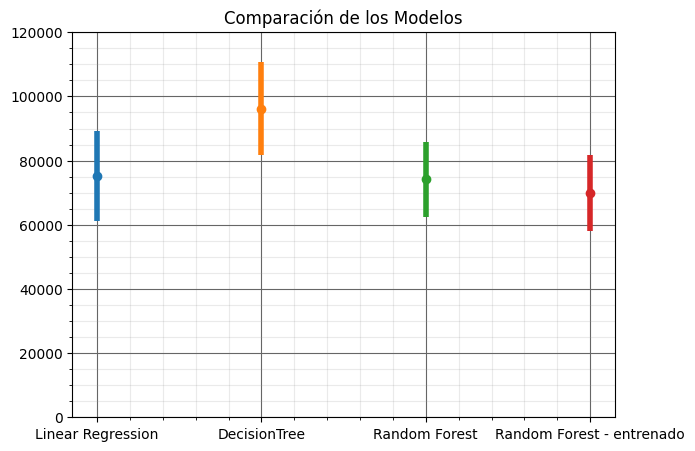

In [79]:
plt.figure(figsize=(7,5))
for i in range(4):
    plt.errorbar(i,list_mean[i],xerr=0,yerr=list_sd[i],fmt='o',linewidth=4)
plt.xticks([0,1,2,3],list_model)
plt.title("Comparación de los Modelos")
plt.ylim(0,120000)
plt.grid(visible=True,which='major',color='#666666',linestyle='-')
plt.minorticks_on()
plt.grid(visible=True,which='minor',color='#999999',linestyle='-',alpha=0.2)
plt.show()

**Analisis de los Resultados**

    A lo largo de este proyecto, aplicamos modelos de regresión de aprendizaje automático de extremo a extremo y aprendimos y obtuvimos varias ideas sobre los modelos de regresión y cómo se desarrollan.

    Logramos observar que para el data set presentado, existe una relación directa entre el precio promedio de la propiedad y su ingreso medio, pero existen varios factores que se escapan de nuestras manos para lograr asegurar que estos modelos tienen un nivel de certeza absoluto, factores como el saber si las características presentadas son suficientes para describir una propiedad y su valor, de igual forma cosas como desconocer las medidas de la propiedad y si estas influyen o no en su valor, si el valor es afectado por la ubicación del predio, entre otros factores y características que sabemos influyen a la hora de determinar el precio promedio de un predio.

    Ahora bien, a la pregunta de si el modelo o los modelos son lo suficientemente robustos o confiables para hacer predicciones consistentes, dada la varianza en el rango de promedio de ingresos y valor promedio de las propiedades, podemos concluir que, se requiere un mejor entrenamiento de los modelos, pues como se ha dicho con anterioridad, requerimos mayor información para llegar a dar certeza en los resultados de cada modelo, si bien se obtienen predicciones para nada alejadas de un concepto real, sí es cierto que el desconocer otros factores altamente relevantes para catalogar un predio con mayor o menor valor medio puede darle esos puntos faltantes que hacen falta para confiar en estos modelos, pues a veces, un modelo podría usar un algoritmo de aprendizaje que no es apropiado para la estructura de los datos dados. Sabemos que un modelo óptimo no es necesariamente un modelo robusto. A veces, un modelo es demasiado complejo o demasiado simple para generalizar suficientemente a nuevos datos.